### Ładowane pakiety

In [8]:
from package import scalarVector, NormalizeVector,conjugateQuaternion, multiQuaternion
import math
import imageio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


### Definiowanie funkcji służącej do obrotu

In [9]:
def rotationquaterion(angle: float, rotation_axis: list, element: list):
    a = math.cos(angle / 2)
    a_vector = scalarVector(math.sin(angle / 2), NormalizeVector(rotation_axis))
    a_conjugate = conjugateQuaternion(a, a_vector)
    mult1 = multiQuaternion(a, a_vector, 0, element)
    return multiQuaternion(mult1[0], mult1[1], a_conjugate[0], a_conjugate[1])[1]

### Funkcja generująca obrazek obruconego bączka z użyciem kwaternionów

In [10]:
def spin3d(speed:float,angle:float,axis_rotation:list,time:int):
    #main_points
    base_point=[0,0,0]
    end_point=[0,0,3]
    h1=1
    r1=1
    h2=1+1/3 
    r2=1/2
    round_1 = np.linspace(0, 2*math.pi, 10**3)
    first_cycle:list  = []
    second_cycle:list = []
    color_change_frequency:int=100
    k=0
    for i in round_1:
        first_cycle.append([r1*math.cos(i),r1*math.sin(i),h1])
        second_cycle.append([r2*math.cos(i),r2*math.sin(i),h2])
    #####
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    #ax.axis('off')

    z_axis = np.linspace(0, 4, 100)
    xy_axis = np.linspace(-4, 4, 100)
    z_0=np.linspace(0, 0, 100)
    end_point_plot = np.linspace(10, 10, 200)
    ax.plot(xy_axis, z_0, z_0,color = 'black', linewidth=1,alpha=0)
    ax.plot(z_0, z_0,z_axis,color = 'black', linewidth=1,alpha=0)
    ax.plot(z_0, xy_axis, z_0,color = 'black', linewidth=1,alpha=0)
    ax.view_init(5,30,0)

    ###
    first_cycle_rotation:list = [] 
    second_cycle_rotation:list = [] 

    i=0
    while i < len(first_cycle):
        ##
    
        ##
        first_cycle_rotation.append(rotationquaterion(angle,axis_rotation,rotationquaterion(speed,[0,0,1],first_cycle[i])))
        second_cycle_rotation.append(rotationquaterion(angle,axis_rotation,rotationquaterion(speed,[0,0,1],second_cycle[i])))
        i=i+1
    first_cycle=first_cycle_rotation
    second_cycle=second_cycle_rotation
    ##
    end_point =  rotationquaterion(angle,[0,0,1],end_point)
    ##
    end_point =  rotationquaterion(angle,axis_rotation,end_point)
    i=0
    lista_test1=[]
    while i < len(first_cycle)-1:
        #1level
        xr1=[base_point[0],first_cycle[i][0],first_cycle[i+1][0]]
        yr1=[base_point[1],first_cycle[i][1],first_cycle[i+1][1]]
        zr1=[base_point[2],first_cycle[i+1][2],first_cycle[i+1][2]]
        verts1 = [list(zip(xr1,yr1,zr1))]
        #2level
        xr2=[first_cycle[i][0],second_cycle[i][0],second_cycle[i+1][0],first_cycle[i+1][0]]
        yr2=[first_cycle[i][1],second_cycle[i][1],second_cycle[i+1][1],first_cycle[i+1][1]]
        zr2=[first_cycle[i][2],second_cycle[i+1][2],second_cycle[i+1][2],first_cycle[i+1][2]]
        verts2 = [list(zip(xr2,yr2,zr2))]
        #3level
        xr3=[end_point[0],second_cycle[i][0],second_cycle[i+1][0]]
        yr3=[end_point[1],second_cycle[i][1],second_cycle[i+1][1]]
        zr3=[end_point[2],second_cycle[i+1][2],second_cycle[i+1][2]]
        verts3 = [list(zip(xr3,yr3,zr3))]
        ##
        if_list = [i % color_change_frequency, round(i/color_change_frequency)]
        lista_test1.append(if_list)
        if if_list[1] % 2 == 0:
            ax.add_collection3d(Poly3DCollection(verts1,facecolors='yellow', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts2,facecolors='black', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts3,facecolors='yellow', linewidths=1))
        if if_list[1] % 2 == 1:
            ax.add_collection3d(Poly3DCollection(verts1,facecolors='black', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts2,facecolors='yellow', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts3,facecolors='black', linewidths=1))
        i=i+1


    #plt.title('Kąt obrotu (' + eulerz + ', '+ eulery + ', '+ eulerx+')')
    
    plt.savefig(f'./Animation/Animation{time}.png',
                dpi=500, 
                transparent = False,  
                facecolor = 'white')
 
    plt.close()

### Tworzenie animacji

In [11]:
size       = 500
time       = 0
axisAngle  = np.linspace(0,32*math.pi, size)
radius     = np.linspace(0,1/4, size)
speedValue = np.linspace(16*(math.pi),math.pi/8, size)

while time<500:
    spin3d(speedValue[time],math.pi,[radius[time]*math.cos(axisAngle[time]),radius[time]*math.sin(axisAngle[time]),(1-radius[time]**2)**(1/2)],time)
    time=time+1

In [12]:
frames = []
t = 0
while t<500:
    image = imageio.v2.imread(f'./Animation/Animation{t}.png')
    frames.append(image)
    t=t+1
imageio.mimwrite('./Animation.gif', # output gif
                frames,
                duration=20,
                loop = 0)         # optional: frames per second

#### Optymalizacja funkcji $spin3d()$

In [3]:
def rotationquaterionChanged(scalar: float, rotation_axis: list, element: list):
    rotation_axis_conjugate = conjugateQuaternion(scalar, rotation_axis)
    mult1 = multiQuaternion(scalar, rotation_axis, 0, element)
    return multiQuaternion(mult1[0], mult1[1], rotation_axis_conjugate[0], rotation_axis_conjugate[1])[1]

In [14]:
def spin3dOptimized(speed:float,angle:float,axis_rotation:list,time:int):
    #main_points
    base_point=[0,0,0]
    end_point=[0,0,3]
    h1=1
    r1=1
    h2=1+1/3 
    r2=1/2
    round_1 = np.linspace(0, 2*math.pi, 10**3)
    first_cycle:list  = []
    second_cycle:list = []
    color_change_frequency:int=100
    k=0
    for i in round_1:
        first_cycle.append([r1*math.cos(i),r1*math.sin(i),h1])
        second_cycle.append([r2*math.cos(i),r2*math.sin(i),h2])
    #####
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    #ax.axis('off')

    z_axis = np.linspace(0, 4, 100)
    xy_axis = np.linspace(-4, 4, 100)
    z_0=np.linspace(0, 0, 100)
    end_point_plot = np.linspace(10, 10, 200)
    ax.plot(xy_axis, z_0, z_0,color = 'black', linewidth=1,alpha=0)
    ax.plot(z_0, z_0,z_axis,color = 'black', linewidth=1,alpha=0)
    ax.plot(z_0, xy_axis, z_0,color = 'black', linewidth=1,alpha=0)
    ax.view_init(5,30,0)

    ###
    first_cycle_rotation:list = [] 
    second_cycle_rotation:list = [] 
    #rotation points
    #rot_matrix = rotation_matrixzyx(z_angle,y_angle,x_angle)
    q1_scalar = math.cos(speed/2)
    q1_vector = [0,0,math.sin(speed/2)]
    q2_scalar = math.cos(angle/2)
    q2_vector = [axis_rotation[0],axis_rotation[1],axis_rotation[2]]
    q1=multiQuaternion(q1_scalar,q1_vector,q2_scalar,q2_vector)
    i=0
    while i < len(first_cycle):
        first_cycle_rotation.append(rotationquaterionChanged(q1[0],q1[1],first_cycle[i]))
        second_cycle_rotation.append(rotationquaterionChanged(q1[0],q1[1],second_cycle[i]))
        # first_cycle_rotation.append(rotationquaterion(rotationAxis[0],rotationAxis[1],first_cycle[i]))
        # second_cycle_rotation.append(rotationquaterion(rotationAxis[0],rotationAxis[1],second_cycle[i]))    
        i=i+1
    first_cycle=first_cycle_rotation
    second_cycle=second_cycle_rotation
    ##
    # base_point = rotationquaterion(angle,[0,0,1],base_point)
    # end_point =  rotationquaterion(angle,[0,0,1],end_point)
    ##
    #base_point = rotationquaterion(newangle,rotationAxis,base_point)
    end_point =  rotationquaterionChanged(q1[0],q1[1],end_point)
    #print(end_point)
    i=0
    lista_test1=[]
    while i < len(first_cycle)-1:
        #1level
        xr1=[base_point[0],first_cycle[i][0],first_cycle[i+1][0]]
        yr1=[base_point[1],first_cycle[i][1],first_cycle[i+1][1]]
        zr1=[base_point[2],first_cycle[i+1][2],first_cycle[i+1][2]]
        verts1 = [list(zip(xr1,yr1,zr1))]
        #2level
        xr2=[first_cycle[i][0],second_cycle[i][0],second_cycle[i+1][0],first_cycle[i+1][0]]
        yr2=[first_cycle[i][1],second_cycle[i][1],second_cycle[i+1][1],first_cycle[i+1][1]]
        zr2=[first_cycle[i][2],second_cycle[i+1][2],second_cycle[i+1][2],first_cycle[i+1][2]]
        verts2 = [list(zip(xr2,yr2,zr2))]
        #3level
        xr3=[end_point[0],second_cycle[i][0],second_cycle[i+1][0]]
        yr3=[end_point[1],second_cycle[i][1],second_cycle[i+1][1]]
        zr3=[end_point[2],second_cycle[i+1][2],second_cycle[i+1][2]]
        verts3 = [list(zip(xr3,yr3,zr3))]
        ##
        if_list = [i % color_change_frequency, round(i/color_change_frequency)]
        lista_test1.append(if_list)
        if if_list[1] % 2 == 0:
            ax.add_collection3d(Poly3DCollection(verts1,facecolors='yellow', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts2,facecolors='black', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts3,facecolors='yellow', linewidths=1))
        if if_list[1] % 2 == 1:
            ax.add_collection3d(Poly3DCollection(verts1,facecolors='black', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts2,facecolors='yellow', linewidths=1))
            ax.add_collection3d(Poly3DCollection(verts3,facecolors='black', linewidths=1))
        i=i+1


    #plt.title('Kąt obrotu (' + eulerz + ', '+ eulery + ', '+ eulerx+')')
    
    plt.savefig(f'./AnimationFasterVersion/AnimationV2{time}.png',
                dpi=500, 
                transparent = False,  
                facecolor = 'white')
 
    plt.close()

### Tworzenie animacji dla zoptymalizowanej funkcji

KeyboardInterrupt: 

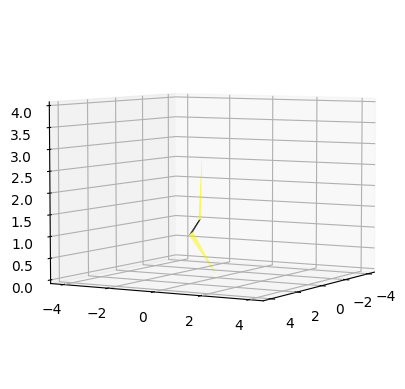

In [15]:
size       = 500
time       = 0
axisAngle  = np.linspace(0,32*math.pi, size)
radius     = np.linspace(0,1/4, size)
speedValue = np.linspace(16*(math.pi),math.pi/8, size)

while time<size:
    spin3dOptimized(speedValue[time],math.pi,[radius[time]*math.cos(axisAngle[time]),radius[time]*math.sin(axisAngle[time]),(1-radius[time]**2)**(1/2)],time)
    time=time+1

In [ ]:
frames = []
t = 0
while t<500:
    image = imageio.v2.imread(f'./AnimationFasterVersion/AnimationV2{t}.png')
    frames.append(image)
    t=t+1
imageio.mimwrite('./AnimationV2test.gif', # output gif
                frames,
                duration=30,
                loop = 0)         # optional: frames per second